In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('2016.csv')

In [3]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [4]:
df.describe()

,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,78.980892,5.382185,5.282395,5.481975,0.953880,0.793621,0.557619,0.370994,0.137624,0.242635,2.325807
std,45.466030,1.141674,1.148043,1.136493,0.412595,0.266706,0.229349,0.145507,0.111038,0.133756,0.542220
min,1.000000,2.905000,2.732000,3.078000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.817890
25%,40.000000,4.404000,4.327000,4.465000,0.670240,0.641840,0.382910,0.257480,0.061260,0.154570,2.031710
50%,79.000000,5.314000,5.237000,5.419000,1.027800,0.841420,0.596590,0.397470,0.105470,0.222450,2.290740
75%,118.000000,6.269000,6.154000,6.434000,1.279640,1.021520,0.729930,0.484530,0.175540,0.311850,2.664650
max,157.000000,7.526000,7.460000,7.669000,1.824270,1.183260,0.952770,0.608480,0.505210,0.819710,3.837720


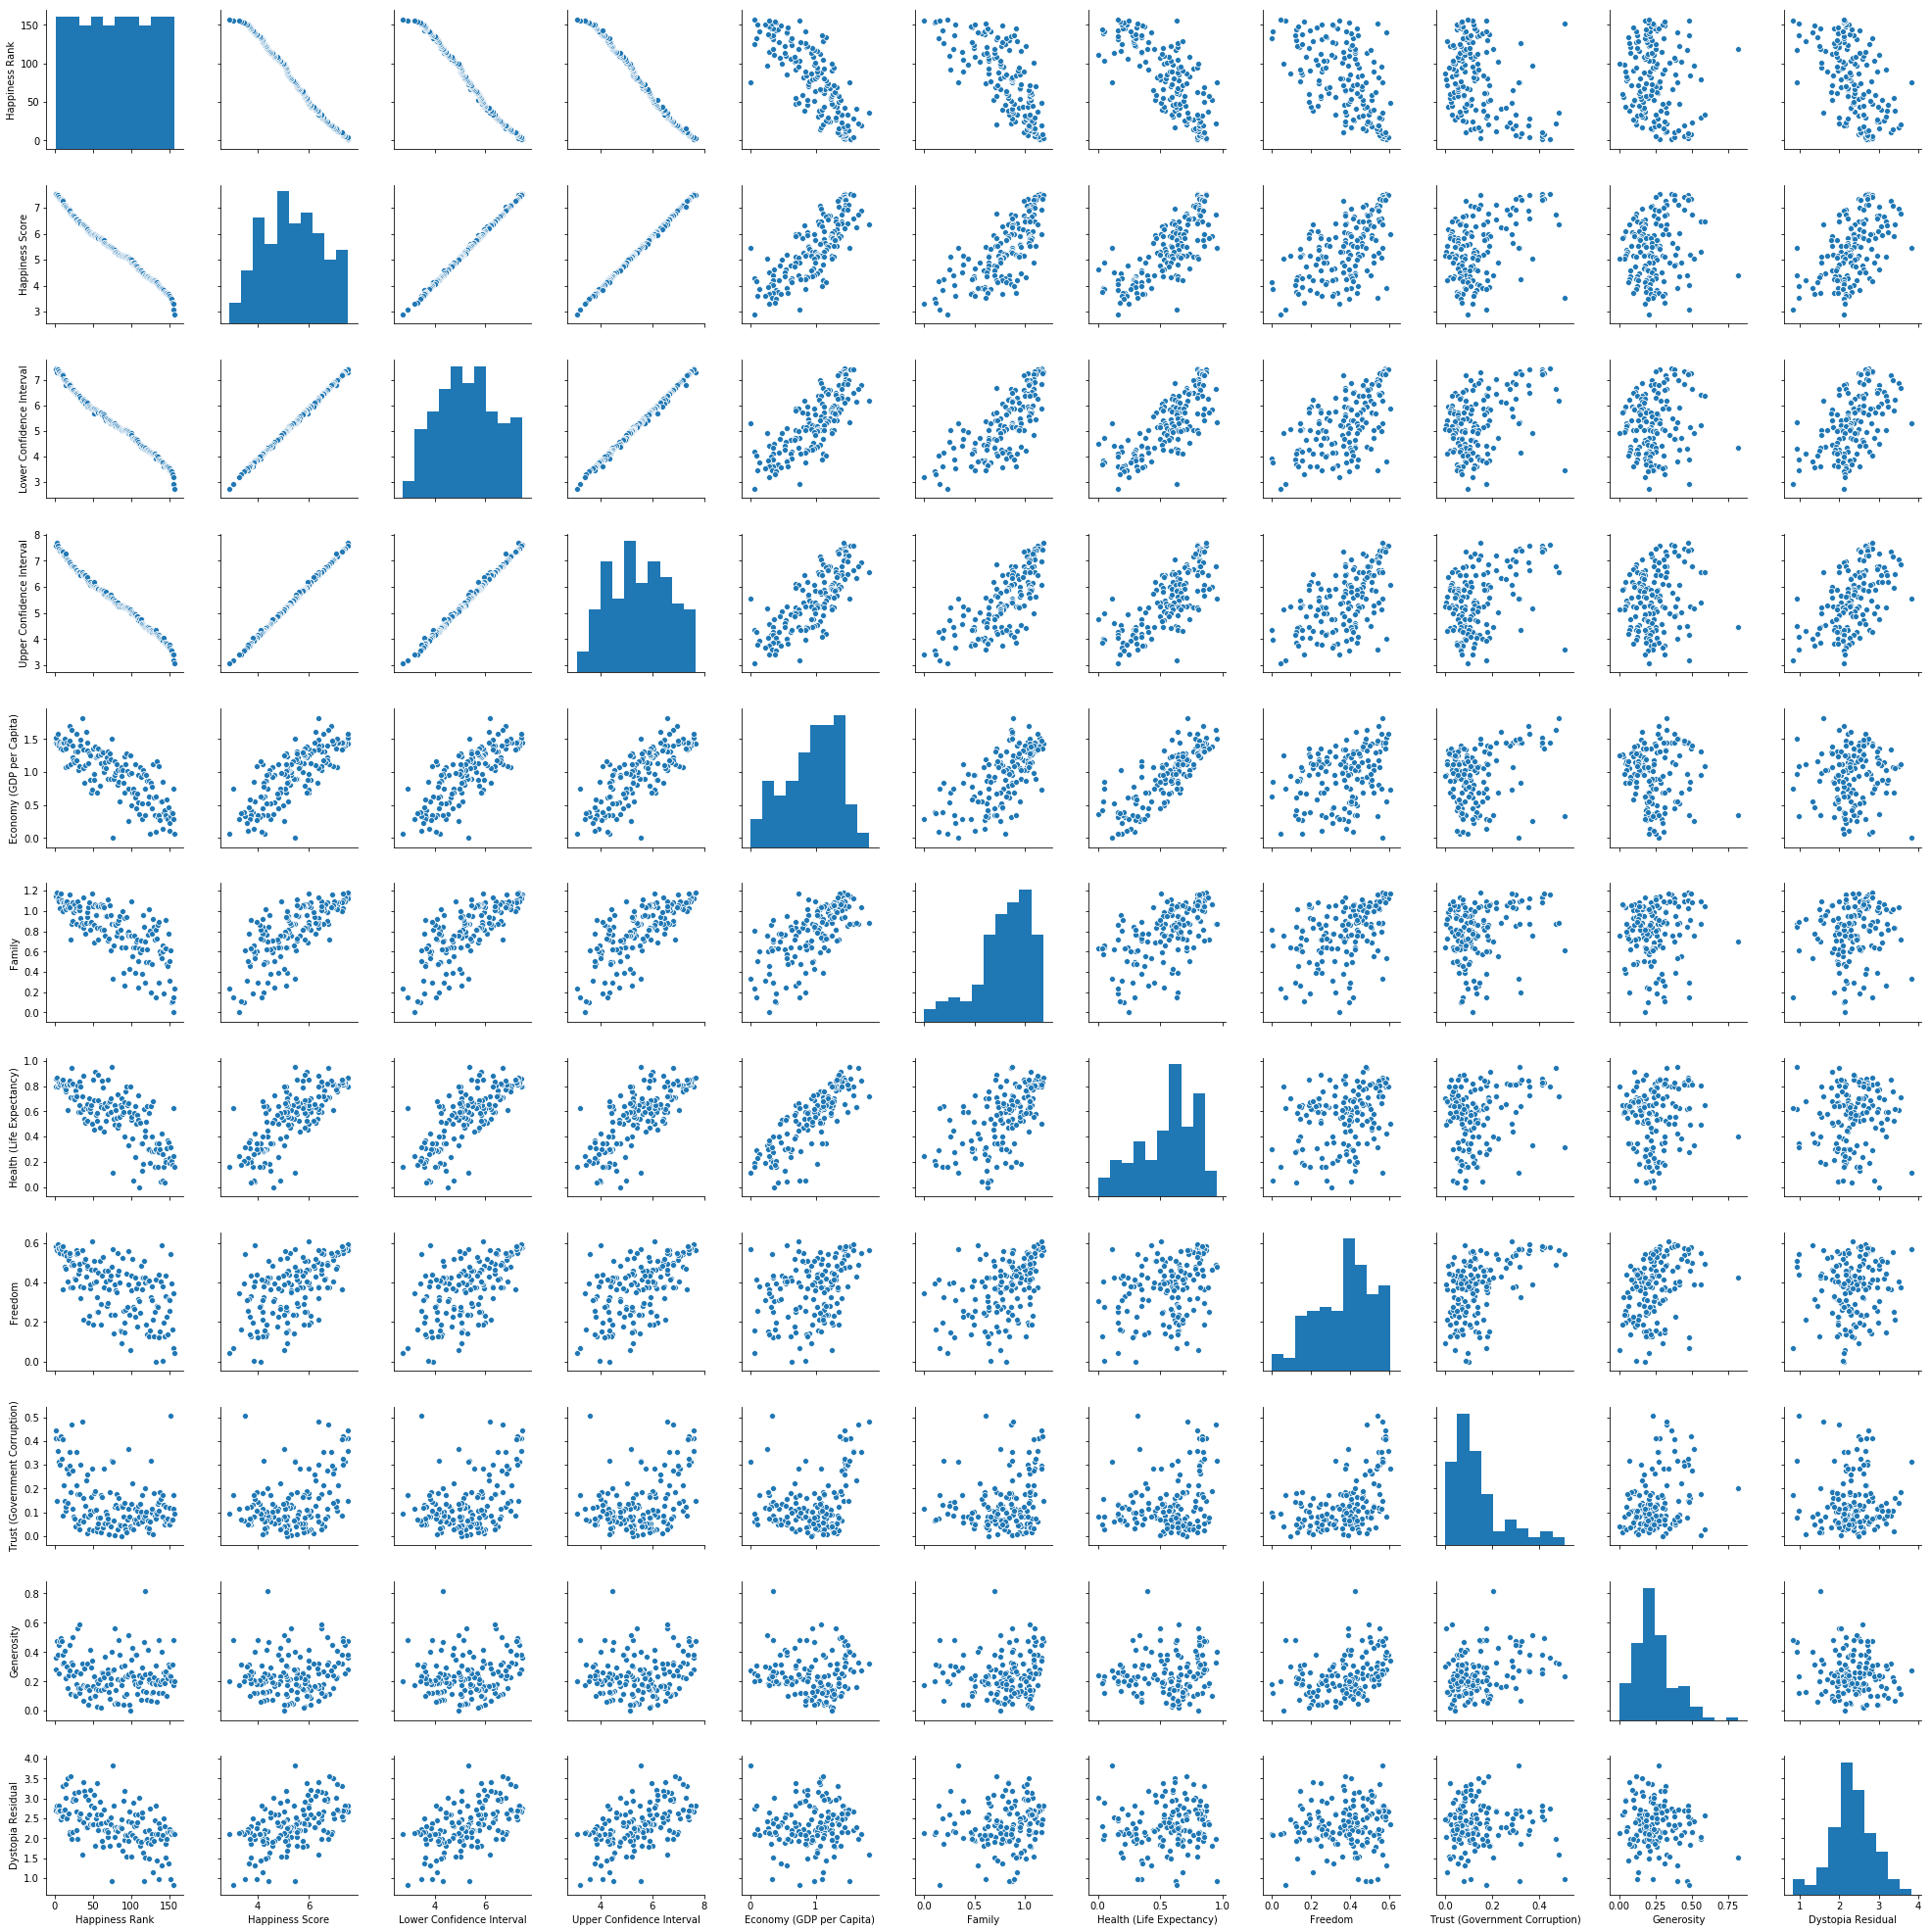

In [5]:
sns.pairplot(df)

In [6]:
df_scaled = df[['Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Generosity','Dystopia Residual']]
y = df['Happiness Score']

In [7]:
from sklearn.preprocessing import StandardScaler
scaled = StandardScaler()

In [8]:
X_scaled = pd.DataFrame(scaled.fit_transform(df_scaled),columns=df_scaled.columns)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train , X_test , y_train , y_test = train_test_split(X_scaled, y, test_size = 0.2 , random_state = 329)

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
model = LinearRegression().fit(X_train,y_train)

In [13]:
coefs = pd.DataFrame(model.coef_.reshape(-1,1), X_train.columns,columns=['Coefs'])

In [14]:
predictions = model.predict(X_test)

In [15]:
compare = pd.DataFrame({'Real': y_test , 'Prediction': predictions})

In [16]:
compare.head()

,Real,Prediction
138,3.916,3.915751
119,4.362,4.361636
134,4.073,4.073196
98,5.033,5.032746
39,6.269,6.269252


In [17]:
from sklearn import metrics
print('MAE', metrics.mean_absolute_error(y_test,predictions))
print('MSE', metrics.mean_squared_error(y_test,predictions))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE 0.00024646213086967905
MSE 7.60652969909592e-08
RMSE 0.00027579937815549766


In [49]:
X_test.columns

Index(['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

In [60]:
data = [[-1.969681,-1.819473,-3.243305,1.245694,0.159700,-1.294421,-0.649459]]
data

[[-1.969681, -1.819473, -3.243305, 1.245694, 0.1597, -1.294421, -0.649459]]

In [61]:
df_data = pd.DataFrame(data, index=['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual']) 
df_data

,0,1,2,3,4,5,6
Economy (GDP per Capita),-1.969681,-1.819473,-3.243305,1.245694,0.1597,-1.294421,-0.649459
Family,-1.969681,-1.819473,-3.243305,1.245694,0.1597,-1.294421,-0.649459
Health (Life Expectancy),-1.969681,-1.819473,-3.243305,1.245694,0.1597,-1.294421,-0.649459
Freedom,-1.969681,-1.819473,-3.243305,1.245694,0.1597,-1.294421,-0.649459
Trust (Government Corruption),-1.969681,-1.819473,-3.243305,1.245694,0.1597,-1.294421,-0.649459
Generosity,-1.969681,-1.819473,-3.243305,1.245694,0.1597,-1.294421,-0.649459
Dystopia Residual,-1.969681,-1.819473,-3.243305,1.245694,0.1597,-1.294421,-0.649459


In [62]:
#data = pd.Series([-1.969681,-1.819473,-3.243305,1.245694,0.159700,-1.294421,-0.649459].reshape(-1,1))
predic = model.predict(df_data)

In [63]:
predic

array([3.02174629, 3.02174629, 3.02174629, 3.02174629, 3.02174629,
       3.02174629, 3.02174629])